## Importing Libraries

In [1]:
import tensorflow as tf

In [2]:
tf.random.set_seed(1234)

In [3]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

from math import sqrt
from numpy.random import seed
seed(1)
from pandas import DataFrame
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM

In [4]:
dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

## Importing and  Manupulating Data

As we have a dataset for classification model we have to convert it in oder to carry out time series analysis.

In [5]:
train_df = pd.read_csv("H1.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [6]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

- Here we first merge Year and Week Number

In [7]:
df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
40055,2017,35
40056,2017,35
40057,2017,35
40058,2017,35


In [8]:
df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
40055    201735
40056    201735
40057    201735
40058    201735
40059    201735
Length: 40060, dtype: object


In [9]:
df2 = DataFrame(c, columns= ['IsCanceled']) 
df2

,IsCanceled
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
40055,0.0
40056,0.0
40057,0.0
40058,0.0


- Now we merge dates and Cancellation incidences

In [10]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'IsCanceled']

In [11]:
df3
df3.sort_values(['FullDate','IsCanceled'], ascending=True)

,FullDate,IsCanceled
0,201527,0.0
1,201527,0.0
2,201527,0.0
3,201527,0.0
4,201527,0.0
...,...,...
13799,201735,1.0
13800,201735,1.0
13801,201735,1.0
13802,201735,1.0


- Taking sum of weekly cancellations and order by date

In [12]:
df4 = df3.groupby('FullDate').agg(sum)
df4
df4.sort_values(['FullDate'], ascending=True)

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201731,173.0
201732,140.0
201733,182.0


In [13]:
tseries=df4['IsCanceled']
tseries

FullDate
201527     41.0
201528     48.0
201529     87.0
201530     74.0
201531    101.0
          ...  
201731    173.0
201732    140.0
201733    182.0
201734    143.0
201735    100.0
Name: IsCanceled, Length: 115, dtype: float64

In [14]:
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.914054
p-value: 0.043738
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581


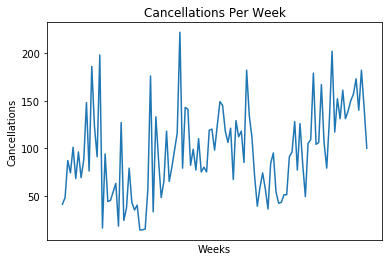

In [15]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('Weeks')
plt.ylabel('Cancellations')
plt.title("Cancellations Per Week")
plt.show()

In [16]:
df=pd.DataFrame(tseries)
df

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0
...,...
201731,173.0
201732,140.0
201733,182.0


In [17]:
df = df[:100]
df.head()

,IsCanceled
FullDate,
201527,41.0
201528,48.0
201529,87.0
201530,74.0
201531,101.0


In [18]:
df=np.array(df)

## Training and Validation

In [19]:
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

## Dataset Matrix

In [20]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
df

array([[ 41.],
       [ 48.],
       [ 87.],
       [ 74.],
       [101.],
       [ 68.],
       [ 96.],
       [ 69.],
       [ 88.],
       [148.],
       [ 76.],
       [186.],
       [123.],
       [ 91.],
       [198.],
       [ 16.],
       [ 94.],
       [ 44.],
       [ 45.],
       [ 54.],
       [ 63.],
       [ 18.],
       [127.],
       [ 24.],
       [ 37.],
       [ 79.],
       [ 43.],
       [ 35.],
       [ 40.],
       [ 14.],
       [ 14.],
       [ 15.],
       [ 57.],
       [176.],
       [ 33.],
       [133.],
       [ 88.],
       [ 48.],
       [ 65.],
       [118.],
       [ 65.],
       [ 80.],
       [ 98.],
       [116.],
       [222.],
       [ 79.],
       [143.],
       [141.],
       [ 82.],
       [ 99.],
       [ 77.],
       [110.],
       [ 75.],
       [ 80.],
       [ 75.],
       [119.],
       [120.],
       [ 98.],
       [124.],
       [149.],
       [145.],
       [118.],
       [106.],
       [121.],
       [ 67.],
       [129.],
       [11

In [22]:
# Lookback period
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_val, Y_val = create_dataset(val, lookback)

In [23]:
X_train

array([[ 41.,  48.,  87.,  74., 101.],
       [ 48.,  87.,  74., 101.,  68.],
       [ 87.,  74., 101.,  68.,  96.],
       [ 74., 101.,  68.,  96.,  69.],
       [101.,  68.,  96.,  69.,  88.],
       [ 68.,  96.,  69.,  88., 148.],
       [ 96.,  69.,  88., 148.,  76.],
       [ 69.,  88., 148.,  76., 186.],
       [ 88., 148.,  76., 186., 123.],
       [148.,  76., 186., 123.,  91.],
       [ 76., 186., 123.,  91., 198.],
       [186., 123.,  91., 198.,  16.],
       [123.,  91., 198.,  16.,  94.],
       [ 91., 198.,  16.,  94.,  44.],
       [198.,  16.,  94.,  44.,  45.],
       [ 16.,  94.,  44.,  45.,  54.],
       [ 94.,  44.,  45.,  54.,  63.],
       [ 44.,  45.,  54.,  63.,  18.],
       [ 45.,  54.,  63.,  18., 127.],
       [ 54.,  63.,  18., 127.,  24.],
       [ 63.,  18., 127.,  24.,  37.],
       [ 18., 127.,  24.,  37.,  79.],
       [127.,  24.,  37.,  79.,  43.],
       [ 24.,  37.,  79.,  43.,  35.],
       [ 37.,  79.,  43.,  35.,  40.],
       [ 79.,  43.,  35.,

In [24]:
X_val

array([[ 54.,  42.,  43.,  51.,  51.],
       [ 42.,  43.,  51.,  51.,  91.],
       [ 43.,  51.,  51.,  91.,  96.],
       [ 51.,  51.,  91.,  96., 128.],
       [ 51.,  91.,  96., 128.,  77.],
       [ 91.,  96., 128.,  77., 126.],
       [ 96., 128.,  77., 126.,  83.],
       [128.,  77., 126.,  83.,  49.],
       [ 77., 126.,  83.,  49., 105.],
       [126.,  83.,  49., 105., 109.],
       [ 83.,  49., 105., 109., 179.],
       [ 49., 105., 109., 179., 104.],
       [105., 109., 179., 104., 106.],
       [109., 179., 104., 106., 167.]])

In [25]:
Y_train

array([ 68.,  96.,  69.,  88., 148.,  76., 186., 123.,  91., 198.,  16.,
        94.,  44.,  45.,  54.,  63.,  18., 127.,  24.,  37.,  79.,  43.,
        35.,  40.,  14.,  14.,  15.,  57., 176.,  33., 133.,  88.,  48.,
        65., 118.,  65.,  80.,  98., 116., 222.,  79., 143., 141.,  82.,
        99.,  77., 110.,  75.,  80.,  75., 119., 120.,  98., 124., 149.,
       145., 118., 106., 121.,  67., 129., 112., 118.,  85., 182., 134.,
       111.,  70.,  39.,  59.,  74.,  57.,  36.,  84.])

## XGBoost Regressor

In [26]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [27]:
trainpred = model.predict(X_train)
trainpred

array([ 68.00038 ,  95.99979 ,  69.00168 ,  88.00018 , 147.99892 ,
        76.000656, 185.99991 , 122.999306,  91.00025 , 197.99966 ,
        16.000645,  94.000175,  44.000202,  45.000084,  54.000114,
        62.998703,  18.000082, 126.997375,  23.999302,  36.999702,
        78.99984 ,  43.00141 ,  34.99988 ,  39.999607,  13.999907,
        14.000368,  15.000608,  57.000042, 175.99893 ,  32.99998 ,
       133.00035 ,  88.000145,  48.0007  ,  65.0003  , 118.00014 ,
        64.999954,  80.00038 ,  98.00058 , 115.9998  , 221.99751 ,
        78.999855, 142.9992  , 141.00027 ,  81.99925 ,  99.000275,
        77.00032 , 110.00013 ,  74.99987 ,  80.0009  ,  75.00079 ,
       118.99793 , 120.0002  ,  98.000145, 123.999916, 148.99962 ,
       145.00026 , 117.999756, 105.999214, 120.999664,  67.001465,
       128.99901 , 111.99981 , 118.00009 ,  85.00055 , 181.99738 ,
       133.9994  , 111.001526,  70.00158 ,  39.0001  ,  58.99967 ,
        74.00109 ,  56.999626,  36.001102,  84.00235 ], dtype=

In [28]:
valpred = model.predict(X_val)
valpred

array([ 19.767576,  62.593506,  80.718994,  60.782364, 129.0691  ,
       112.3979  , 113.64816 ,  91.60748 , 105.40695 ,  62.221115,
       109.42688 , 126.32669 ,  94.05386 ,  62.81558 ], dtype=float32)

In [29]:
Y_val

array([ 91.,  96., 128.,  77., 126.,  83.,  49., 105., 109., 179., 104.,
       106., 167., 106.])

In [30]:
Y_train=Y_train.reshape(-1,1)
Y_train

array([[ 68.],
       [ 96.],
       [ 69.],
       [ 88.],
       [148.],
       [ 76.],
       [186.],
       [123.],
       [ 91.],
       [198.],
       [ 16.],
       [ 94.],
       [ 44.],
       [ 45.],
       [ 54.],
       [ 63.],
       [ 18.],
       [127.],
       [ 24.],
       [ 37.],
       [ 79.],
       [ 43.],
       [ 35.],
       [ 40.],
       [ 14.],
       [ 14.],
       [ 15.],
       [ 57.],
       [176.],
       [ 33.],
       [133.],
       [ 88.],
       [ 48.],
       [ 65.],
       [118.],
       [ 65.],
       [ 80.],
       [ 98.],
       [116.],
       [222.],
       [ 79.],
       [143.],
       [141.],
       [ 82.],
       [ 99.],
       [ 77.],
       [110.],
       [ 75.],
       [ 80.],
       [ 75.],
       [119.],
       [120.],
       [ 98.],
       [124.],
       [149.],
       [145.],
       [118.],
       [106.],
       [121.],
       [ 67.],
       [129.],
       [112.],
       [118.],
       [ 85.],
       [182.],
       [134.],
       [11

In [31]:
trainpred=trainpred.reshape(-1,1)
trainpred

array([[ 68.00038 ],
       [ 95.99979 ],
       [ 69.00168 ],
       [ 88.00018 ],
       [147.99892 ],
       [ 76.000656],
       [185.99991 ],
       [122.999306],
       [ 91.00025 ],
       [197.99966 ],
       [ 16.000645],
       [ 94.000175],
       [ 44.000202],
       [ 45.000084],
       [ 54.000114],
       [ 62.998703],
       [ 18.000082],
       [126.997375],
       [ 23.999302],
       [ 36.999702],
       [ 78.99984 ],
       [ 43.00141 ],
       [ 34.99988 ],
       [ 39.999607],
       [ 13.999907],
       [ 14.000368],
       [ 15.000608],
       [ 57.000042],
       [175.99893 ],
       [ 32.99998 ],
       [133.00035 ],
       [ 88.000145],
       [ 48.0007  ],
       [ 65.0003  ],
       [118.00014 ],
       [ 64.999954],
       [ 80.00038 ],
       [ 98.00058 ],
       [115.9998  ],
       [221.99751 ],
       [ 78.999855],
       [142.9992  ],
       [141.00027 ],
       [ 81.99925 ],
       [ 99.000275],
       [ 77.00032 ],
       [110.00013 ],
       [ 74.9

In [32]:
Y_val=Y_val.reshape(-1,1)
Y_val

array([[ 91.],
       [ 96.],
       [128.],
       [ 77.],
       [126.],
       [ 83.],
       [ 49.],
       [105.],
       [109.],
       [179.],
       [104.],
       [106.],
       [167.],
       [106.]])

In [33]:
valpred=valpred.reshape(-1,1)
valpred

array([[ 19.767576],
       [ 62.593506],
       [ 80.718994],
       [ 60.782364],
       [129.0691  ],
       [112.3979  ],
       [113.64816 ],
       [ 91.60748 ],
       [105.40695 ],
       [ 62.221115],
       [109.42688 ],
       [126.32669 ],
       [ 94.05386 ],
       [ 62.81558 ]], dtype=float32)

In [34]:
#Training set root mean squared error
train_mse = mean_squared_error(Y_train, trainpred)
rmse = sqrt(train_mse)
print('RMSE: %f' % rmse)

RMSE: 0.000887


In [35]:
#Validation set root mean squared error
val_mse = mean_squared_error(Y_val, valpred)
rmse = sqrt(val_mse)
print('RMSE: %f' % rmse)

RMSE: 50.142536


In [36]:
Y_val.shape

(14, 1)

In [37]:
Y_val

array([[ 91.],
       [ 96.],
       [128.],
       [ 77.],
       [126.],
       [ 83.],
       [ 49.],
       [105.],
       [109.],
       [179.],
       [104.],
       [106.],
       [167.],
       [106.]])

In [38]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [39]:
np.mean(Y_val)

109.0